In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("precision",2)

%matplotlib inline

In [2]:
df = pd.read_csv("w4inhome_dvn.tab", sep="\t")
df.head()

,AID,IMONTH4,IDAY4,IYEAR4,BIO_SEX4,VERSION4,BREAK_Q,PRYEAR4,PRETEST4,PRISON4,H4OD1M,H4OD1Y,H4OD2A,H4OD2B,H4OD2C,H4OD2D,H4OD2E,H4OD2F,H4OD3,H4OD4,H4OD5,H4OD6Y,H4OD7,H4WP1,H4WP2Y,H4WP3,H4WP4,H4WP5,H4WP6,H4WP7,H4WP8Y,H4WP9,H4WP10,H4WP11,H4WP12,H4WP13,H4WP14,H4WP15Y,H4WP16,H4WP17,H4WP18,H4WP19,H4WP20,H4WP21,H4WP22,H4WP23,H4WP24,H4WP25,H4WP26,H4WP27,...,H4CDAY,H4CYEAR,H4ARM,H4CUFF,H4CUFFLG,H4SBP,H4DBP,H4BPCLS,H4BPFLG,H4PR,H4PP,H4MAP,H4HGT,H4WGT,H4WTLBS,H4BMI,H4BMICLS,H4WAIST,H4IR1,H4IR2,H4IR3,H4IR4,H4IR5,H4IR6,H4IR7,H4IR8,H4IR8A,H4IR9,H4IR9A,H4IR10,H4IR11,H4IR12,H4IR13,H4IR14,H4EO1,H4EO2,H4EO3,H4EO4,H4EO5A,H4EO5B,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,57101310,5,6,2008,2,V5.4,NO,2001,0,0,11,1976,1,0,0,0,0,0,97,1,7,9997,7,0,2004,0,97,97,97,0,1989,0,97,97,97,1,7,9997,7,7,97,97,97,7,7,7,7,7,7,1,...,6,2008,1.0,2.0,0,123.0,88.5,2.0,1.0,86.0,34.5,100.0,180.0,113.9,0,35.2,5,119.0,4.0,4.0,3.0,2.0,0.0,97.0,2.0,1.0,97.0,1.0,97.0,2.0,0.0,7.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1,57103869,5,22,2008,1,V5.4,NO,2002,0,0,1,1976,1,0,0,0,0,0,97,1,7,9997,7,1,9997,0,97,97,97,1,9997,1,2,98,30,1,7,9997,7,7,97,97,1,7,7,1,5,2,1,6,...,22,2008,1.0,2.0,0,130.5,84.0,2.0,1.0,91.5,46.5,99.5,202.0,107.8,0,26.4,3,108.0,3.0,3.0,3.0,2.0,0.0,97.0,1.0,1.0,97.0,1.0,97.0,2.0,0.0,7.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
2,57109625,11,2,2008,1,V5.5,NO,2002,0,0,3,1981,1,0,0,0,0,0,97,1,7,9997,7,1,9997,0,97,97,97,1,9997,0,97,97,97,1,7,9997,7,7,97,97,3,4,4,2,4,1,1,4,...,2,2008,1.0,1.0,0,126.5,85.5,2.0,1.0,77.0,41.0,99.2,161.0,68.0,0,26.2,3,88.0,4.0,4.0,4.0,1.0,0.0,97.0,1.0,4.0,97.0,4.0,97.0,2.0,0.0,7.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57111071,6,29,2008,1,V5.4,NO,2001,0,0,6,1981,1,0,0,0,0,0,97,1,7,9997,7,1,9997,0,97,97,97,1,9997,0,97,97,97,1,7,9997,7,7,97,97,4,4,4,1,5,0,0,1,...,27,2008,1.0,1.0,0,138.5,86.5,2.0,1.0,76.0,52.0,103.8,177.0,89.4,0,28.5,3,99.0,4.0,3.0,3.0,1.0,0.0,97.0,1.0,1.0,97.0,1.0,97.0,2.0,0.0,7.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,57113943,11,11,2008,1,V5.5,NO,2002,0,0,1,1979,1,0,0,0,0,0,97,1,7,9997,7,1,9997,0,97,97,97,0,1997,1,2,8,8,1,7,9997,7,7,97,97,2,5,4,1,5,0,0,4,...,11,2008,6.0,6.0,0,996.0,996.0,6.0,5.0,996.0,996.0,996.0,185.5,150.6,0,43.8,6,138.5,3.0,3.0,4.0,2.0,1.0,2.0,2.0,1.0,97.0,1.0,97.0,2.0,0.0,7.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0


In [3]:
mappings = {
           "AID":"AID",
           "BIO_SEX4":"Gender",
           "H4OD3":"What language do you use most with your family and close relatives?",
           "H4OD4":"Were you born a US citizen?", 
           "H4WP3":"(Has/did) your biological mother ever (spent/spend) time in jail or prison?", 
           "H4WP9":"(Has/did) your biological father ever (spent/spend) time in jail or prison?",
           "H4GH1":"In general, how is your health?",
           "H4GH5I":"How tall are you in feet?",
           "H4GH7":"How do you think of yourself in terms of weight?", 
           "H4HS1":"Which of the following best describes your current health insurance situation?",
           "H4HS9":"In the past 12 months have you received psychological or emotional counseling?",
           "H4SP5":"How often did you have trouble falling asleep?",
           "H4ED2":"What is the highest level of education that you have achieved to date?", 
           "H4MI1":"Have you ever been in the military?", 
           "H4MI2":"Was your military service in the US, outside the US, or both?",
           "H4EC1" :"Thinking about your income and the income of everyone who lives in your household and contributes to the household budget, what was the total household income before taxes and deductions in {2006/2007/2008}?",  
           "H4EC3":"What is your best guess of your personal earnings before taxes?",
           "H4RE1":"What is your present religion?", 
            ## Criminal Offending Cols
           "H4TO3": "Have you ever smoked cigarettes regularly--that is, at least one cigarette every day for 30 days?",
           "H4TO11":"How many cigarettes a day do you smoke?",
           "H4TO21":"How old were you the first time you had any of these cigarette smoking experiences?",
           "H4TO23":"Have you smoked a cigar or pipe at least 20 times in your entire life?",
           "H4TO24":"During the past 30 days, how many days did you smoke cigars or a pipe?",
           "H4TO25":"Have you used chewing tobacco (such as Red Man, Garrett, or Beechnut) or snuff (such as Skoal, Skoal Bandits, or Copenhagen) at least 20 times in your entire life?",
           "H4TO26":"During the past 30 days, on how many days have you used chewing tobacco (such as Red Man, Garrett, or Beechnut) or snuff (such as Skoal, Skoal Bandits, or Copenhagen)?",
           "H4TO27":"Have you ever tried to quit or cut down on smoking or using tobacco?",
           "H4TO31":"Did you smoke cigarettes, cigars, a pipe or use chewing tobacco within the past 24 hours?",
           "H4TO33":"Have you had a drink of beer, wine, or liquor more than two or three times?",
           "H4TO34":"How old were you when you first had an alcoholic drink?",
           "H4TO46":"How often has your drinking interfered with your responsibilities at work or school?",
           "H4TO47":"How often have you been under the influence of alcohol when you could have gotten yourself or others hurt, or put yourself or others at risk, including unprotected sex?",
           "H4TO48":"How often have you had legal problems because of your drinking, like being arrested for disturbing the peace or driving under the influence of alcohol, or anything else?",
           "H4TO49":"How often have you had problems with your family, friends, or people at work or school because of your drinking?",
           "H4TO50":"Did you continue to drink after you realized drinking was causing you problems with family, friends, or people at work or school?" ,
           "H4TO64A":"sedatives or downers, such as barbiturates, sleeping pills, Quaalude, or Seconal",
           "H4TO64D":"pain killers or opioids, such as Vicodin, OxyContin, Percocet, Demerol, Percodan, or Tylenol with codeine",
           "H4TO65A":"steroids, anabolic steroids or 'body building' drugs",
           "H4TO65B":"marijuana (hash, bhang, ganja)",
           "H4TO65C":"cocaine (crack, coca leaves)",
           "H4TO65D":"crystal meth (ice)",
           "H4TO65E":"other types of illegal drugs, such as LSD, PCP, ecstasy, heroin, or mushrooms; or inhalants" ,
           "H4TO66":"Have you ever injected (shot up with a needle) any illegal drug, such as heroin or cocaine?",
           ## Children and Parenting Starts
           "H4KK14":"What language do you speak to your child/children when you are together at home?",
           "H4KK15A":"I am happy in my role as parent.",
           "H4KK15B":"I feel close to my child(ren).",
           "H4KK15C":"The major source of stress in my life is my child(ren).",
           "H4KK15D":"I feel overwhelmed by the responsibility of being a parent.",
           ## Criminal Offending and Victimization
           "H4DS1":"In the past 12 months, how often did you deliberately damage property that didn't belong to you?",
           "H4DS2":"In the past 12 months, how often did you steal something worth more than $50?",
           "H4DS3":"In the past 12 months, how often did you go into a house or building to steal something?",
           "H4DS4":"In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?",
           "H4DS5":"In the past 12 months, how often did you sell marijuana or other drugs?",
           "H4DS6":"In the past 12 months, how often did you steal something worth less than $50?",
           "H4DS7":"In the past 12 months, how often did you take part in a physical fight where a group of your friends was against another group?",
           "H4DS8":"In the past 12 months, how often did you buy, sell, or hold stolen property?",
           "H4DS9":"In the past 12 months, how often did you use someone else's credit card, bank card, or automatic teller card without their permission or knowledge?",
           #"H4DS10":"In the past 12 months, how often did you deliberately write a bad check?",
           "H4DS11":"In the past 12 months, how often did you get into a serious physical fight?",
           "H4DS12":"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?",
           #"H4DS13":"Someone stole something from you worth more than $50?",
           #"H4DS14":"You saw someone shoot or stab another person?",
           "H4DS15":"Someone pulled a knife or gun on you?",
           "H4DS16":"Someone shot or stabbed you?",
           "H4DS17":"Someone slapped, hit, choked, or kicked you?",
           "H4DS18":"You were beaten up?",
           "H4DS19":"You pulled a knife or gun on someone?",
           "H4DS20":"You shot or stabbed someone?",
           }

In [4]:
final_df = df[mappings.keys()]
final_df.columns = [mappings[col] for col in final_df.columns]
final_df = final_df.fillna(0)
final_df.head()

,AID,Gender,What language do you use most with your family and close relatives?,Were you born a US citizen?,(Has/did) your biological mother ever (spent/spend) time in jail or prison?,(Has/did) your biological father ever (spent/spend) time in jail or prison?,"In general, how is your health?",How tall are you in feet?,How do you think of yourself in terms of weight?,Which of the following best describes your current health insurance situation?,In the past 12 months have you received psychological or emotional counseling?,How often did you have trouble falling asleep?,What is the highest level of education that you have achieved to date?,Have you ever been in the military?,"Was your military service in the US, outside the US, or both?","Thinking about your income and the income of everyone who lives in your household and contributes to the household budget, what was the total household income before taxes and deductions in {2006/2007/2008}?",What is your best guess of your personal earnings before taxes?,What is your present religion?,"Have you ever smoked cigarettes regularly--that is, at least one cigarette every day for 30 days?",How many cigarettes a day do you smoke?,How old were you the first time you had any of these cigarette smoking experiences?,Have you smoked a cigar or pipe at least 20 times in your entire life?,"During the past 30 days, how many days did you smoke cigars or a pipe?","Have you used chewing tobacco (such as Red Man, Garrett, or Beechnut) or snuff (such as Skoal, Skoal Bandits, or Copenhagen) at least 20 times in your entire life?","During the past 30 days, on how many days have you used chewing tobacco (such as Red Man, Garrett, or Beechnut) or snuff (such as Skoal, Skoal Bandits, or Copenhagen)?",Have you ever tried to quit or cut down on smoking or using tobacco?,"Did you smoke cigarettes, cigars, a pipe or use chewing tobacco within the past 24 hours?","Have you had a drink of beer, wine, or liquor more than two or three times?",How old were you when you first had an alcoholic drink?,How often has your drinking interfered with your responsibilities at work or school?,"How often have you been under the influence of alcohol when you could have gotten yourself or others hurt, or put yourself or others at risk, including unprotected sex?","How often have you had legal problems because of your drinking, like being arrested for disturbing the peace or driving under the influence of alcohol, or anything else?","How often have you had problems with your family, friends, or people at work or school because of your drinking?","Did you continue to drink after you realized drinking was causing you problems with family, friends, or people at work or school?","sedatives or downers, such as barbiturates, sleeping pills, Quaalude, or Seconal","pain killers or opioids, such as Vicodin, OxyContin, Percocet, Demerol, Percodan, or Tylenol with codeine","steroids, anabolic steroids or 'body building' drugs","marijuana (hash, bhang, ganja)","cocaine (crack, coca leaves)",crystal meth (ice),"other types of illegal drugs, such as LSD, PCP, ecstasy, heroin, or mushrooms; or inhalants","Have you ever injected (shot up with a needle) any illegal drug, such as heroin or cocaine?",What language do you speak to your child/children when you are together at home?,I am happy in my role as parent.,I feel close to my child(ren).,The major source of stress in my life is my child(ren).,I feel overwhelmed by the responsibility of being a parent.,"In the past 12 months, how often did you deliberately damage property that didn't belong to you?","In the past 12 months, how often did you steal something worth more than $50?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you steal 

In [5]:
crime_types = ["In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?",
          "In the past 12 months, how often did you get into a serious physical fight?",
          "In the past 12 months, how often did you buy, sell, or hold stolen property?",
          "In the past 12 months, how often did you sell marijuana or other drugs?",
          "In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?",
          "In the past 12 months, how often did you go into a house or building to steal something?",
          "In the past 12 months, how often did you deliberately damage property that didn't belong to you?",
        ] + [
          "Someone pulled a knife or gun on you?",
          "Someone shot or stabbed you?",
          "Someone slapped, hit, choked, or kicked you?",
          "You were beaten up?",
          "You pulled a knife or gun on someone?",
          "You shot or stabbed someone?"
        ]
crime_source_types = ["Have you ever smoked cigarettes regularly--that is, at least one cigarette every day for 30 days?",
        "Have you had a drink of beer, wine, or liquor more than two or three times?",
        "sedatives or downers, such as barbiturates, sleeping pills, Quaalude, or Seconal",
        "pain killers or opioids, such as Vicodin, OxyContin, Percocet, Demerol, Percodan, or Tylenol with codeine",
        "steroids, anabolic steroids or 'body building' drugs",
        "marijuana (hash, bhang, ganja)",
        "cocaine (crack, coca leaves)",
        "crystal meth (ice)",
        "other types of illegal drugs, such as LSD, PCP, ecstasy, heroin, or mushrooms; or inhalants" ,
        "Have you ever injected (shot up with a needle) any illegal drug, such as heroin or cocaine?",
        "Have you used chewing tobacco (such as Red Man, Garrett, or Beechnut) or snuff (such as Skoal, Skoal Bandits, or Copenhagen) at least 20 times in your entire life?"
       ]

In [7]:
def col_to_bad_habbit_counter(main_col):
    crime_src_type_cnt = {}
    for col in crime_source_types:
        intermediate_df = final_df.groupby([main_col,col]).count()[["AID"]].reset_index()
        main_col_wise_count = {}
        for val in intermediate_df[main_col].unique():
            temp = intermediate_df[intermediate_df[main_col] == val]
            if temp[temp[col]==1.0]["AID"].values:
                main_col_wise_count[val] = temp[temp[col]==1.0]["AID"].values[0]
            else:
                main_col_wise_count[val] = 0
        crime_src_type_cnt[col] = main_col_wise_count

    df = pd.DataFrame(crime_src_type_cnt)
    df.index.name = main_col
    #df.index = ["Male", "Female"]
    return df

def col_to_crime_type_counter(main_col):
    crime_src_type_cnt = {}
    for col in crime_types:
        intermediate_df = final_df.groupby([main_col,col]).count()[["AID"]].reset_index()
        main_col_wise_count = {}
        for val in intermediate_df[main_col].unique():
            temp = intermediate_df[intermediate_df[main_col] == val]
            if temp[temp[col]==1.0]["AID"].values:
                main_col_wise_count[val] = temp[temp[col]==1.0]["AID"].values.sum()
            else:
                main_col_wise_count[val] = 0
        crime_src_type_cnt[col] = main_col_wise_count

    df = pd.DataFrame(crime_src_type_cnt)
    df.index.name = main_col
    return df

In [63]:
gender_df = col_to_bad_habbit_counter("Gender")
gender_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
gender_df.index = ["Male", "Female"]
gender_df.index.name = "Gender"
gender_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
Gender,,,,,,,,,,,
Male,1163,1945,260,407,79,1404,561,255,618,25,505
Female,1149,2142,199,314,16,1374,411,204,478,13,26


In [9]:
gender_df = col_to_crime_type_counter("Gender")
gender_df.index = ["Male", "Female"]
gender_df.index.name = "Gender"
gender_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
Gender,,,,,,,,,,,,,
Male,75,175,74,61,23,13,117,202,88,285,87,95,40
Female,12,59,29,27,11,8,61,110,70,193,64,31,18


In [74]:
citizenship_df = col_to_bad_habbit_counter("Were you born a US citizen?")
citizenship_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
citizenship_df.index = ["No","Yes"]
citizenship_df.index.name = "Were you born a US citizen?"
citizenship_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
Were you born a US citizen?,,,,,,,,,,,
No,53,118,7,9,1,54,23,11,17,1,6
Yes,2259,3969,452,712,94,2724,949,448,1079,37,525


In [11]:
citizenship_df = col_to_crime_type_counter("Were you born a US citizen?")
citizenship_df.index = ["No","Yes"]
citizenship_df.index.name = "Were you born a US citizen?"
citizenship_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
Were you born a US citizen?,,,,,,,,,,,,,
No,1,6,4,0,2,2,7,12,9,13,7,5,3
Yes,86,228,99,88,32,19,171,300,149,465,144,121,55


In [73]:
mother_with_crime_history_df = col_to_bad_habbit_counter("(Has/did) your biological mother ever (spent/spend) time in jail or prison?")
mother_with_crime_history_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
mother_with_crime_history_df.index = ["No","Yes","Refused","Dont Know"]
mother_with_crime_history_df.index.name = "(Has/did) your biological mother ever (spent/spend) time in jail or prison?"
mother_with_crime_history_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
(Has/did) your biological mother ever (spent/spend) time in jail or prison?,,,,,,,,,,,
No,2174,3916,441,690,91,2641,915,424,1039,36,507
Yes,103,133,12,26,4,109,48,29,46,2,21
Refused,0,0,0,0,0,0,0,0,0,0,0
Dont Know,35,38,6,5,0,28,9,6,11,0,3


In [13]:
mother_with_crime_history_df = col_to_crime_type_counter("(Has/did) your biological mother ever (spent/spend) time in jail or prison?")
mother_with_crime_history_df.index = ["No","Yes","Refused","Dont Know"]
mother_with_crime_history_df.index.name = "(Has/did) your biological mother ever (spent/spend) time in jail or prison?"
mother_with_crime_history_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
(Has/did) your biological mother ever (spent/spend) time in jail or prison?,,,,,,,,,,,,,
No,81,218,94,82,33,20,160,298,150,447,141,119,56
Yes,4,14,7,5,0,1,14,11,7,25,9,7,2
Refused,0,0,0,0,0,0,0,0,0,0,0,0,0
Dont Know,2,2,2,1,1,0,4,3,1,6,1,0,0


In [72]:
father_with_crime_history_df = col_to_bad_habbit_counter("(Has/did) your biological father ever (spent/spend) time in jail or prison?")
father_with_crime_history_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
father_with_crime_history_df.index = ["No","Yes","Refused","Dont Know"]
father_with_crime_history_df.index.name = "(Has/did) your biological father ever (spent/spend) time in jail or prison?"
father_with_crime_history_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
(Has/did) your biological father ever (spent/spend) time in jail or prison?,,,,,,,,,,,
No,1765,3267,345,557,75,2169,731,321,863,28,428
Yes,394,584,86,123,16,440,171,106,165,9,79
Refused,0,1,0,0,0,0,0,0,0,0,0
Dont Know,153,235,28,41,4,169,70,32,68,1,24


In [15]:
father_with_crime_history_df = col_to_crime_type_counter("(Has/did) your biological father ever (spent/spend) time in jail or prison?")
father_with_crime_history_df.index = ["No","Yes","Refused","Dont Know"]
father_with_crime_history_df.index.name = "(Has/did) your biological father ever (spent/spend) time in jail or prison?"
father_with_crime_history_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
(Has/did) your biological father ever (spent/spend) time in jail or prison?,,,,,,,,,,,,,
No,49,160,78,63,20,14,130,234,125,346,104,102,45
Yes,29,60,18,22,10,5,38,60,25,100,35,18,11
Refused,0,0,0,0,0,0,0,0,0,0,0,0,0
Dont Know,9,14,7,3,4,2,10,18,8,32,12,6,2


In [71]:
counselling_df = col_to_bad_habbit_counter("In the past 12 months have you received psychological or emotional counseling?")
counselling_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
counselling_df.index = ["No","Yes","Dont Know"]
counselling_df.index.name = "In the past 12 months have you received psychological or emotional counseling?"
counselling_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
In the past 12 months have you received psychological or emotional counseling?,,,,,,,,,,,
No,2045,3644,380,604,86,2434,819,399,930,23,486
Yes,266,442,79,117,9,343,152,60,166,15,45
Dont Know,1,1,0,0,0,1,1,0,0,0,0


In [17]:
counselling_df = col_to_crime_type_counter("In the past 12 months have you received psychological or emotional counseling?")
counselling_df.index = ["No","Yes","Dont Know"]
counselling_df.index.name = "In the past 12 months have you received psychological or emotional counseling?"
counselling_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
In the past 12 months have you received psychological or emotional counseling?,,,,,,,,,,,,,
No,71,200,86,74,28,18,149,258,134,404,117,111,48
Yes,16,34,17,14,6,3,29,54,24,74,34,15,10
Dont Know,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
sleeping_df = col_to_bad_habbit_counter("How often did you have trouble falling asleep?")
sleeping_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
sleeping_df.index = ["Never","less than once a week","1 or 2 times a week","3 or 4 times a week","5 or more times a week","not asked on pretest","don't know"]
sleeping_df.index.name = "How often did you have trouble falling asleep?"
sleeping_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
How often did you have trouble falling asleep?,,,,,,,,,,,
Never,996,1857,151,260,46,1204,389,182,450,13,247
less than once a week,398,798,91,142,17,526,191,69,224,6,98
1 or 2 times a week,422,764,91,143,14,511,188,90,203,7,99
3 or 4 times a week,207,309,53,75,8,240,92,49,93,5,40
5 or more times a week,270,320,64,89,10,269,102,62,114,5,40
not asked on pretest,18,39,8,12,0,27,9,7,11,2,7
don't know,1,0,1,0,0,1,1,0,1,0,0


In [19]:
sleeping_df = col_to_crime_type_counter("How often did you have trouble falling asleep?")
sleeping_df.index = ["Never","less than once a week","1 or 2 times a week","3 or 4 times a week","5 or more times a week","not asked on pretest","don't know"]
sleeping_df.index.name = "How often did you have trouble falling asleep?"
sleeping_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
How often did you have trouble falling asleep?,,,,,,,,,,,,,
Never,34,95,40,30,13,11,58,122,68,180,59,55,24
less than once a week,12,33,15,18,4,2,25,45,20,74,15,12,8
1 or 2 times a week,18,49,21,16,7,2,46,77,39,105,34,26,10
3 or 4 times a week,11,20,12,11,5,4,21,31,15,43,13,12,5
5 or more times a week,11,34,13,9,5,2,26,32,15,64,27,19,9
not asked on pretest,1,3,2,4,0,0,2,5,1,11,3,2,2
don't know,0,0,0,0,0,0,0,0,0,1,0,0,0


In [69]:
religion_df = col_to_bad_habbit_counter("What is your present religion?")
religion_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
religion_df.index = ["None","Pretestant","Catholic","Other Christian","Jewish","Buddhist","Hindu","Muslim","Other","Refused","Dont Know"]
religion_df.index.name = "What is your present religion?"
religion_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
What is your present religion?,,,,,,,,,,,
None,544,832,142,222,16,654,274,130,350,10,118
Pretestant,694,1271,118,175,22,769,230,118,248,12,175
Catholic,407,781,80,117,24,512,193,81,202,4,108
Other Christian,474,880,80,140,23,605,190,93,195,6,101
Jewish,12,31,2,9,1,28,9,3,10,1,2
Buddhist,11,21,4,4,1,15,7,4,9,1,2
Hindu,1,4,0,0,0,1,0,0,0,0,0
Muslim,4,3,0,1,0,6,1,0,1,0,0
Other,158,251,33,52,7,182,65,29,79,4,25


In [21]:
religion_df = col_to_crime_type_counter("What is your present religion?")

religion_df.index = ["None","Pretestant","Catholic","Other Christian","Jewish","Buddhist","Hindu","Muslim","Other","Refused","Dont Know"]
religion_df.index.name = "What is your present religion?"
religion_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
What is your present religion?,,,,,,,,,,,,,
None,21,65,17,20,7,1,51,59,27,110,40,22,14
Pretestant,27,59,27,21,11,7,45,105,49,135,34,45,15
Catholic,10,32,29,20,4,4,33,50,31,77,24,21,10
Other Christian,23,53,21,20,6,7,36,67,35,111,34,24,12
Jewish,1,2,0,0,0,1,3,1,0,2,0,1,1
Buddhist,0,0,1,0,0,0,1,2,0,1,0,0,0
Hindu,0,0,0,0,0,0,0,1,0,0,0,0,0
Muslim,0,1,1,1,1,0,0,1,2,3,1,0,0
Other,5,21,7,6,5,1,9,26,14,39,18,13,6


In [67]:
health_df = col_to_bad_habbit_counter("In general, how is your health?")
health_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
health_df.index = ["Excellent","Very Good","Good","Fair","Poor",]
health_df.index.name = "In general, how is your health?"
health_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
"In general, how is your health?",,,,,,,,,,,
Excellent,326,776,63,99,22,472,140,58,176,6,114
Very Good,847,1610,176,282,32,1093,372,167,451,10,204
Good,876,1342,163,263,28,942,353,179,382,14,175
Fair,229,316,49,64,10,235,98,46,79,6,31
Poor,34,43,8,13,3,36,9,9,8,2,7


In [23]:
health_df = col_to_crime_type_counter("In general, how is your health?")
health_df.index = ["Excellent","Very Good","Good","Fair","Poor",]
health_df.index.name = "In general, how is your health?"
health_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
"In general, how is your health?",,,,,,,,,,,,,
Excellent,16,41,15,6,5,1,23,55,37,73,29,25,13
Very Good,23,71,34,28,8,5,57,110,51,170,46,49,20
Good,33,86,37,46,19,8,65,110,49,165,44,39,19
Fair,12,31,15,7,2,6,26,28,14,58,23,9,3
Poor,3,5,2,1,0,1,7,9,7,12,9,4,3


In [66]:
language_df = col_to_bad_habbit_counter("What language do you use most with your family and close relatives?")
language_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
language_df.index = ["English","Spanish","Chinese","Other European Lang","Other Asian Lang","Other","Skip"]
language_df.index.name = "What language do you use most with your family and close relatives?"
language_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
What language do you use most with your family and close relatives?,,,,,,,,,,,
English,226,495,65,99,14,341,139,58,169,7,61
Spanish,39,102,9,5,3,51,20,10,10,0,6
Chinese,0,6,0,0,0,2,0,0,0,0,0
Other European Lang,3,4,0,2,0,1,1,0,1,0,0
Other Asian Lang,8,11,1,1,0,7,2,0,2,0,1
Other,0,0,0,0,0,1,0,0,0,0,0
Skip,2036,3469,384,614,78,2375,810,391,914,31,463


In [53]:
language_df = col_to_crime_type_counter("What language do you use most with your family and close relatives?")
language_df.index = ["English","Spanish","Chinese","Other European Lang","Other Asian Lang","Other","Skip"]
language_df.index.name = "What language do you use most with your family and close relatives?"
language_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
What language do you use most with your family and close relatives?,,,,,,,,,,,,,
English,9,29,15,14,5,4,30,38,24,58,13,14,5
Spanish,1,5,9,1,1,0,9,14,6,16,6,7,3
Chinese,0,0,0,0,0,0,0,0,0,0,0,0,0
Other European Lang,0,1,0,0,0,0,0,0,0,1,0,0,0
Other Asian Lang,0,0,0,0,0,0,0,0,0,2,0,0,0
Other,0,0,0,0,0,0,0,0,0,0,0,0,0
Skip,77,199,79,73,28,17,139,260,128,401,132,105,50


In [65]:
weight_df = col_to_bad_habbit_counter("How do you think of yourself in terms of weight?")
weight_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
weight_df.index = ["Very Underweight","Slight Underweight","About Right","Slight Overweight","Very Overweight","Refused","Dont Know"]
weight_df.index.name = "How do you think of yourself in terms of weight?"
weight_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
How do you think of yourself in terms of weight?,,,,,,,,,,,
Very Underweight,25,31,3,4,1,26,11,5,10,0,2
Slight Underweight,208,302,50,73,7,239,98,38,105,7,60
About Right,777,1431,178,263,40,988,379,180,455,17,206
Slight Overweight,981,1762,176,290,41,1182,390,190,427,12,225
Very Overweight,321,559,52,91,6,343,94,46,99,2,38
Refused,0,1,0,0,0,0,0,0,0,0,0
Dont Know,0,1,0,0,0,0,0,0,0,0,0


In [57]:
weight_df = col_to_crime_type_counter("How do you think of yourself in terms of weight?")
weight_df.index = ["Very Underweight","Slight Underweight","About Right","Slight Overweight","Very Overweight","Refused","Dont Know"]
weight_df.index.name = "How do you think of yourself in terms of weight?"
weight_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
How do you think of yourself in terms of weight?,,,,,,,,,,,,,
Very Underweight,2,5,2,1,2,1,6,8,5,11,4,6,1
Slight Underweight,13,35,16,20,1,2,25,38,16,50,16,14,5
About Right,33,89,39,31,18,6,55,117,55,157,56,47,25
Slight Overweight,31,83,39,30,10,8,72,121,69,207,58,49,21
Very Overweight,8,22,7,6,3,4,20,28,13,53,17,10,6
Refused,0,0,0,0,0,0,0,0,0,0,0,0,0
Dont Know,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
education_df = col_to_bad_habbit_counter("What is the highest level of education that you have achieved to date?")
education_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
education_df.index = ["8th Grade/Less","Some High School","High School Grad","Some Vocational Training","Completed Vocational/Technical Training","Some College","Bachelor Degree","Some Graduate School", "Masters Degree", "Some Graduate Training Beyond Masters","PHD", "Some Law,Medical,Nurse","Completed Law,Medical,Nurse","Dont Know"]
education_df.index.name = "What is the highest level of education that you have achieved to date?"
education_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
What is the highest level of education that you have achieved to date?,,,,,,,,,,,
8th Grade/Less,14,10,1,2,1,9,5,3,4,0,0
Some High School,264,254,40,55,6,216,98,59,75,3,42
High School Grad,458,595,70,120,19,434,172,109,162,7,116
Some Vocational Training,104,150,18,24,7,104,47,31,45,1,30
Completed Vocational/Technical Training,166,260,33,53,9,168,63,38,70,4,41
Some College,842,1386,192,289,37,968,355,169,411,22,187
Bachelor Degree,330,872,77,119,11,567,162,33,224,1,84
Some Graduate School,46,171,8,17,1,99,24,6,39,0,11
Masters Degree,45,215,8,22,1,113,23,5,34,0,8


In [61]:
education_df = col_to_crime_type_counter("What is the highest level of education that you have achieved to date?")
education_df.index = ["8th Grade/Less","Some High School","High School Grad","Some Vocational Training","Completed Vocational/Technical Training","Some College","Bachelor Degree","Some Graduate School", "Masters Degree", "Some Graduate Training Beyond Masters","PHD", "Some Law,Medical,Nurse","Completed Law,Medical,Nurse","Dont Know"]
education_df.index.name = "What is the highest level of education that you have achieved to date?"
education_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
What is the highest level of education that you have achieved to date?,,,,,,,,,,,,,
8th Grade/Less,2,4,0,0,0,0,3,1,1,3,3,0,0
Some High School,18,45,12,17,5,4,24,55,27,65,29,15,9
High School Grad,20,56,20,24,8,5,32,68,34,93,34,28,14
Some Vocational Training,3,14,6,6,4,1,14,10,6,20,5,4,1
Completed Vocational/Technical Training,8,17,6,7,2,3,8,20,6,24,3,8,2
Some College,27,68,43,28,14,7,59,102,54,193,54,52,22
Bachelor Degree,7,23,10,4,0,1,20,35,20,55,14,16,8
Some Graduate School,1,1,1,0,0,0,6,7,3,7,3,1,1
Masters Degree,1,3,4,1,1,0,6,7,3,6,3,1,0


In [83]:
military_df = col_to_bad_habbit_counter("Have you ever been in the military?")
military_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
military_df.index = ["No","Yes",]
military_df.index.name = "Have you ever been in the military?"
military_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
Have you ever been in the military?,,,,,,,,,,,
No,2134,3786,423,669,90,2594,906,426,1025,36,459
Yes,178,301,36,52,5,184,66,33,71,2,72


In [84]:
military_df = col_to_crime_type_counter("Have you ever been in the military?")
military_df.index = ["No","Yes",]
military_df.index.name = "Have you ever been in the military?"
military_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
Have you ever been in the military?,,,,,,,,,,,,,
No,75,214,92,81,32,20,164,281,146,426,137,105,50
Yes,12,20,11,7,2,1,14,31,12,52,14,21,8


In [79]:
military_df = col_to_bad_habbit_counter("Was your military service in the US, outside the US, or both?")
military_df.columns = ["Smoking", "Drinking","Sedatives","Pain killers","Steroids","Marijuana",
                     "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)", 
                     "injected Illegal Drug","Tobacco",
                     ]
military_df.index = ["In US","Out US","Both","None"]
military_df.index.name = "Was your military service in the US, outside the US, or both?"
military_df

,Smoking,Drinking,Sedatives,Pain killers,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco
"Was your military service in the US, outside the US, or both?",,,,,,,,,,,
In US,86,147,18,23,1,93,39,19,43,1,36
Out US,9,10,2,2,0,8,1,0,3,0,1
Both,83,144,16,27,4,83,26,14,25,1,35
None,2134,3786,423,669,90,2594,906,426,1025,36,459


In [80]:
military_df = col_to_crime_type_counter("Was your military service in the US, outside the US, or both?")
military_df.index = ["In US","Out US","Both","None"]
military_df.index.name = "Was your military service in the US, outside the US, or both?"
military_df

,"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?","In the past 12 months, how often did you get into a serious physical fight?","In the past 12 months, how often did you buy, sell, or hold stolen property?","In the past 12 months, how often did you sell marijuana or other drugs?","In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?","In the past 12 months, how often did you go into a house or building to steal something?","In the past 12 months, how often did you deliberately damage property that didn't belong to you?",Someone pulled a knife or gun on you?,Someone shot or stabbed you?,"Someone slapped, hit, choked, or kicked you?",You were beaten up?,You pulled a knife or gun on someone?,You shot or stabbed someone?
"Was your military service in the US, outside the US, or both?",,,,,,,,,,,,,
In US,7,11,3,3,1,1,4,10,5,26,6,7,1
Out US,1,1,1,1,0,0,0,2,1,2,1,2,1
Both,4,8,7,3,1,0,10,19,6,24,7,12,6
None,75,214,92,81,32,20,164,281,146,426,137,105,50


In [24]:
crime_type_count = {}

for crime_typ in crime_types:
    crime_type_count[crime_typ] = sum([1 for val in final_df[crime_typ].values if val in [1,2,3]])

crime_type_df = pd.DataFrame(crime_type_count.values(), index=crime_type_count.keys())
crime_type_df.index = ["Physical Fight Hurting", "Serious Fight", "Buy/Sold Stolen Property",
                            "Buy/Sold Marijuana/Drugs", "Theaten Others", "Enter to Steal",
                            "Damage Others Property", "Somone Pulled Knife/Gun on You", "Somone Shot/Stabbed You",
                                "Somone Slapped/Hit/Kicked You", "You were Beaten Up",
                                "You Pulled Knife/Gun at Someone", "You Shot/Stabbed Someone"]
crime_type_df

,0
Physical Fight Hurting,99
Serious Fight,261
Buy/Sold Stolen Property,134
Buy/Sold Marijuana/Drugs,226
Theaten Others,43
Enter to Steal,33
Damage Others Property,203
Somone Pulled Knife/Gun on You,312
Somone Shot/Stabbed You,158
Somone Slapped/Hit/Kicked You,478


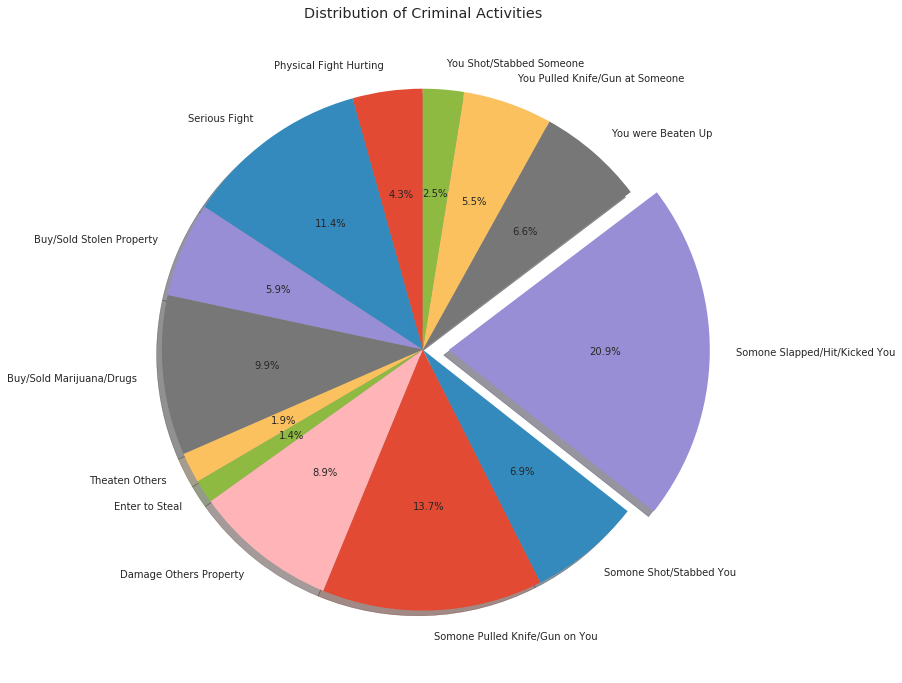

In [89]:
with plt.style.context(("seaborn", "ggplot")):
    plt.figure(figsize=(12,12))
    length = [0] * crime_type_df.shape[0]
    length[np.argmax(crime_type_df.values.flatten())] = 0.1
    plt.pie(x=crime_type_df.values.flatten(), 
            labels=crime_type_df.index,
            autopct="%.1f%%", 
            explode=length,
            shadow=True, 
            startangle=90)
    plt.title("Distribution of Criminal Activities");

In [85]:
crime_source_types_count = {}

for crime_typ in crime_source_types:
    crime_source_types_count[crime_typ] = sum([1 for val in final_df[crime_typ].values if val in [1,2,3]])

crime_source_type_df = pd.DataFrame(crime_source_types_count.values(), index=crime_source_types_count.keys())
crime_source_type_df.index = ["Smoking", "Drinking", "Sedatives or Downers", "Pain killers or Opioids","Steroids",
                              "Marijuana", "Cocaine", "Crystal meth", "Illegal drugs(LSD, PCP, etc)",
                             "injected Illegal Drug", "Tobacco"]
crime_source_type_df

,0
Smoking,2312
Drinking,4087
Sedatives or Downers,459
Pain killers or Opioids,721
Steroids,95
Marijuana,2778
Cocaine,972
Crystal meth,459
"Illegal drugs(LSD, PCP, etc)",1096
injected Illegal Drug,38


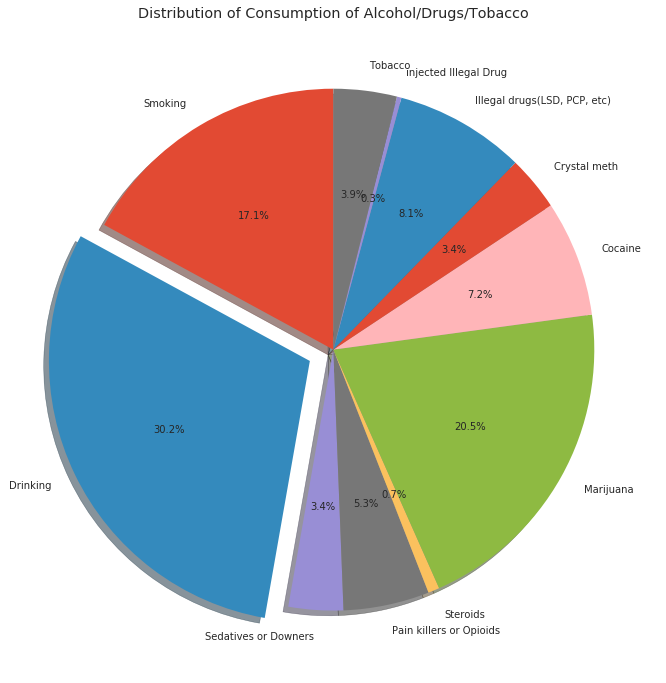

In [88]:
with plt.style.context(("seaborn", "ggplot")):
    plt.figure(figsize=(12,12))
    length = [0] * crime_source_type_df.shape[0]
    length[np.argmax(crime_source_type_df.values.flatten())] = 0.1
    plt.pie(x=crime_source_type_df.values.flatten(), 
            labels=crime_source_type_df.index,
            autopct="%.1f%%", 
            explode=length,
            shadow=True, 
            startangle=90)
    plt.title("Distribution of Consumption of Alcohol/Drugs/Tobacco");

In [28]:
x_cols = [
        "Have you ever smoked cigarettes regularly--that is, at least one cigarette every day for 30 days?",
        "Have you had a drink of beer, wine, or liquor more than two or three times?",
        "sedatives or downers, such as barbiturates, sleeping pills, Quaalude, or Seconal",
        "pain killers or opioids, such as Vicodin, OxyContin, Percocet, Demerol, Percodan, or Tylenol with codeine",
        "steroids, anabolic steroids or 'body building' drugs",
        "marijuana (hash, bhang, ganja)",
        "cocaine (crack, coca leaves)",
        "crystal meth (ice)",
        "other types of illegal drugs, such as LSD, PCP, ecstasy, heroin, or mushrooms; or inhalants" ,
        "Have you ever injected (shot up with a needle) any illegal drug, such as heroin or cocaine?",
        "Have you used chewing tobacco (such as Red Man, Garrett, or Beechnut) or snuff (such as Skoal, Skoal Bandits, or Copenhagen) at least 20 times in your entire life?"
       ]
y_cols = [
          "Someone pulled a knife or gun on you?",
          "Someone shot or stabbed you?",
          "Someone slapped, hit, choked, or kicked you?",
          "You were beaten up?",
          "You pulled a knife or gun on someone?",
          "You shot or stabbed someone?"
        ]

crime_count = {}
for col1 in y_cols:
    bad_habbit_count  = {}
    for col2 in x_cols:
        intermediate_df = final_df.groupby([col1,col2]).count()[["AID"]]
        intermediate_df = intermediate_df.reset_index().rename(columns={"AID":"Count"})
        intermediate_df = intermediate_df[intermediate_df[col1]==1]
        if 1 in intermediate_df[col2].values:
            bad_habbit_count[col2] = intermediate_df[intermediate_df[col2] == 1].Count.values[0]
        else:
            bad_habbit_count[col2] = 0
    crime_count[col1] = bad_habbit_count
    
crime_to_source_df1 = pd.DataFrame(crime_count).T
crime_to_source_df1

,"Have you ever injected (shot up with a needle) any illegal drug, such as heroin or cocaine?","Have you ever smoked cigarettes regularly--that is, at least one cigarette every day for 30 days?","Have you had a drink of beer, wine, or liquor more than two or three times?","Have you used chewing tobacco (such as Red Man, Garrett, or Beechnut) or snuff (such as Skoal, Skoal Bandits, or Copenhagen) at least 20 times in your entire life?","cocaine (crack, coca leaves)",crystal meth (ice),"marijuana (hash, bhang, ganja)","other types of illegal drugs, such as LSD, PCP, ecstasy, heroin, or mushrooms; or inhalants","pain killers or opioids, such as Vicodin, OxyContin, Percocet, Demerol, Percodan, or Tylenol with codeine","sedatives or downers, such as barbiturates, sleeping pills, Quaalude, or Seconal","steroids, anabolic steroids or 'body building' drugs"
Someone pulled a knife or gun on you?,8,161,221,46,69,55,175,67,55,50,11
Someone shot or stabbed you?,5,79,107,17,28,25,85,27,24,18,5
"Someone slapped, hit, choked, or kicked you?",15,296,399,79,163,101,334,160,127,92,14
You were beaten up?,6,104,119,18,48,37,101,49,39,31,2
You pulled a knife or gun on someone?,3,71,101,22,29,20,80,32,24,14,2
You shot or stabbed someone?,3,35,42,7,12,11,35,14,14,9,1


In [29]:
crime_to_source_df1.columns = ["injected Illegal Drug","Smoking","Drinking","Tobacco","Cocaine","Crystal meth",
                               "Marijuana","Illegal drugs(LSD, PCP, etc)","Pain killers or Opioids","Sedatives or Downers",
                               "Steroids"]
crime_to_source_df1.head()

,injected Illegal Drug,Smoking,Drinking,Tobacco,Cocaine,Crystal meth,Marijuana,"Illegal drugs(LSD, PCP, etc)",Pain killers or Opioids,Sedatives or Downers,Steroids
Someone pulled a knife or gun on you?,8,161,221,46,69,55,175,67,55,50,11
Someone shot or stabbed you?,5,79,107,17,28,25,85,27,24,18,5
"Someone slapped, hit, choked, or kicked you?",15,296,399,79,163,101,334,160,127,92,14
You were beaten up?,6,104,119,18,48,37,101,49,39,31,2
You pulled a knife or gun on someone?,3,71,101,22,29,20,80,32,24,14,2


In [30]:
x_cols = ["Have you ever smoked cigarettes regularly--that is, at least one cigarette every day for 30 days?",
        "Have you had a drink of beer, wine, or liquor more than two or three times?",
        "sedatives or downers, such as barbiturates, sleeping pills, Quaalude, or Seconal",
        "pain killers or opioids, such as Vicodin, OxyContin, Percocet, Demerol, Percodan, or Tylenol with codeine",
        "steroids, anabolic steroids or 'body building' drugs",
        "marijuana (hash, bhang, ganja)",
        "cocaine (crack, coca leaves)",
        "crystal meth (ice)",
        "other types of illegal drugs, such as LSD, PCP, ecstasy, heroin, or mushrooms; or inhalants" ,
        "Have you ever injected (shot up with a needle) any illegal drug, such as heroin or cocaine?",
        "Have you used chewing tobacco (such as Red Man, Garrett, or Beechnut) or snuff (such as Skoal, Skoal Bandits, or Copenhagen) at least 20 times in your entire life?"
       ]
y_cols = ["In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?",
          "In the past 12 months, how often did you get into a serious physical fight?",
          "In the past 12 months, how often did you buy, sell, or hold stolen property?",
          "In the past 12 months, how often did you sell marijuana or other drugs?",
          "In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?",
          "In the past 12 months, how often did you go into a house or building to steal something?",
          "In the past 12 months, how often did you deliberately damage property that didn't belong to you?",
        ]

crime_count = {}
for col1 in y_cols:
    bad_habbit_count  = {}
    for col2 in x_cols:
        intermediate_df = final_df.groupby([col1,col2]).count()[["AID"]]
        intermediate_df = intermediate_df.reset_index().rename(columns={"AID":"Count"})
        intermediate_df = intermediate_df[intermediate_df[col1]==1]
        if 1 in intermediate_df[col2].values:
            bad_habbit_count[col2] = intermediate_df[intermediate_df[col2].isin([1,2,3])].Count.values[0]
        else:
            bad_habbit_count[col2] = 0
    crime_count[col1] = bad_habbit_count
    
crime_to_source_df2 = pd.DataFrame(crime_count).T
crime_to_source_df2

,"Have you ever injected (shot up with a needle) any illegal drug, such as heroin or cocaine?","Have you ever smoked cigarettes regularly--that is, at least one cigarette every day for 30 days?","Have you had a drink of beer, wine, or liquor more than two or three times?","Have you used chewing tobacco (such as Red Man, Garrett, or Beechnut) or snuff (such as Skoal, Skoal Bandits, or Copenhagen) at least 20 times in your entire life?","cocaine (crack, coca leaves)",crystal meth (ice),"marijuana (hash, bhang, ganja)","other types of illegal drugs, such as LSD, PCP, ecstasy, heroin, or mushrooms; or inhalants","pain killers or opioids, such as Vicodin, OxyContin, Percocet, Demerol, Percodan, or Tylenol with codeine","sedatives or downers, such as barbiturates, sleeping pills, Quaalude, or Seconal","steroids, anabolic steroids or 'body building' drugs"
"In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?",2,63,74,25,38,21,65,39,31,22,4
"In the past 12 months, how often did you get into a serious physical fight?",5,151,200,52,92,50,177,92,65,52,12
"In the past 12 months, how often did you buy, sell, or hold stolen property?",7,70,90,17,46,24,83,42,32,26,6
"In the past 12 months, how often did you sell marijuana or other drugs?",6,67,76,18,48,23,78,46,37,28,3
"In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?",1,22,28,4,12,11,22,13,6,6,1
"In the past 12 months, how often did you go into a house or building to steal something?",0,10,16,3,4,5,15,7,7,4,0
"In the past 12 months, how often did you deliberately damage property that didn't belong to you?",2,104,155,22,67,35,125,59,52,37,8


In [31]:
crime_to_source_df2.columns = ["injected Illegal Drug","Smoking","Drinking","Tobacco","Cocaine","Crystal meth",
                               "Marijuana","Illegal drugs(LSD, PCP, etc)","Pain killers or Opioids","Sedatives or Downers",
                               "Steroids"]
crime_to_source_df2.index = ["Physical Fight Hurting", "Serious Fight", "Buy/Sold Stolen Property",
                            "Buy/Sold Marijuana/Drugs", "Theaten Others", "Enter to Steal","Damage Others Property"]
crime_to_source_df2.head()

,injected Illegal Drug,Smoking,Drinking,Tobacco,Cocaine,Crystal meth,Marijuana,"Illegal drugs(LSD, PCP, etc)",Pain killers or Opioids,Sedatives or Downers,Steroids
Physical Fight Hurting,2,63,74,25,38,21,65,39,31,22,4
Serious Fight,5,151,200,52,92,50,177,92,65,52,12
Buy/Sold Stolen Property,7,70,90,17,46,24,83,42,32,26,6
Buy/Sold Marijuana/Drugs,6,67,76,18,48,23,78,46,37,28,3
Theaten Others,1,22,28,4,12,11,22,13,6,6,1


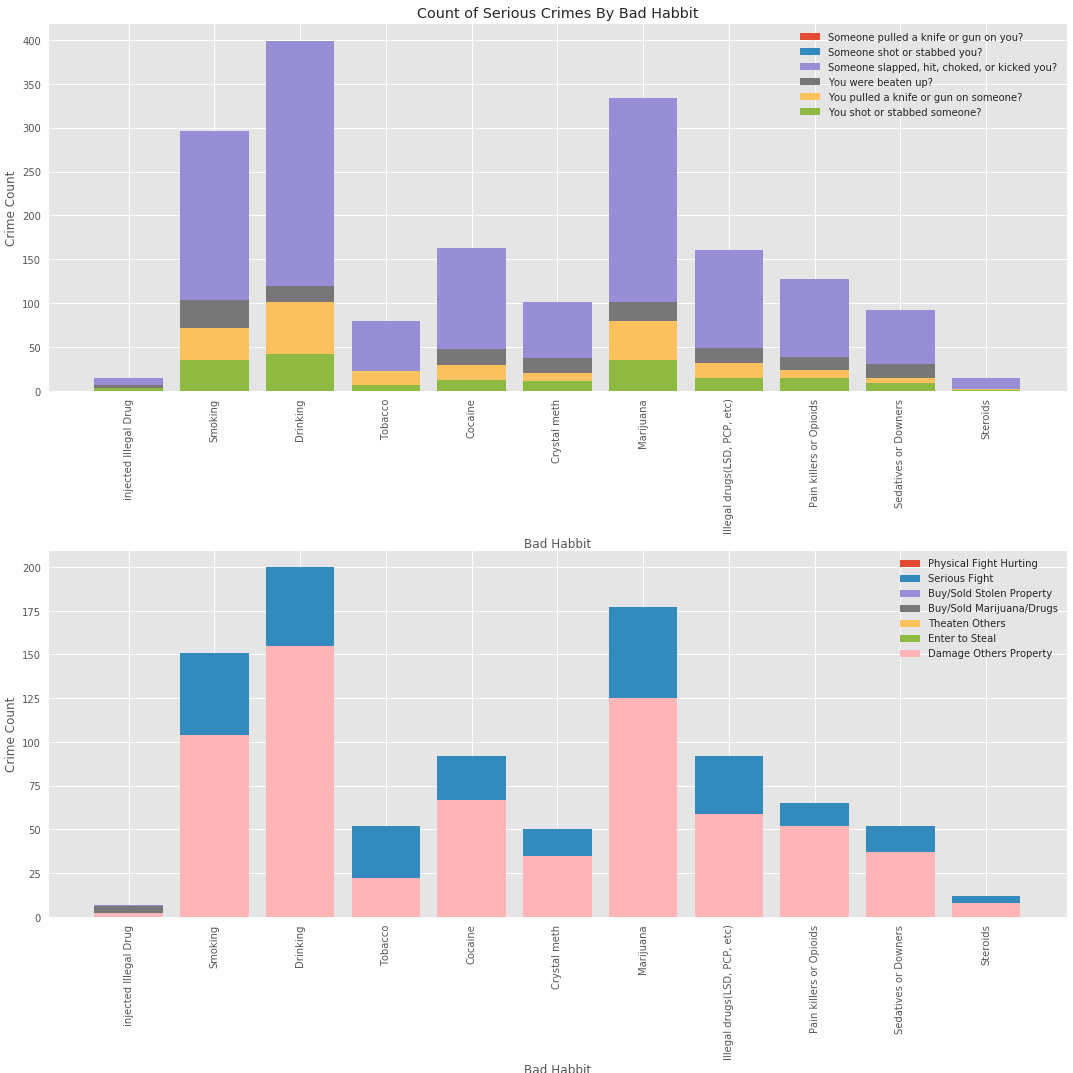

In [90]:
with plt.style.context(("seaborn", "ggplot")):
    plt.figure(figsize=(15,15))
    plt.subplot(211)
    for idx in crime_to_source_df1.index:
        intermediate_series = crime_to_source_df1.loc[idx]
        plt.bar(intermediate_series.index, intermediate_series.values, label=idx)
        plt.xlabel("Bad Habbit")
        plt.ylabel("Crime Count")
        plt.xticks(rotation=90)
        plt.title("Count of Serious Crimes By Bad Habbit")
        plt.legend(loc="best")
        

    plt.subplot(212)
    for idx in crime_to_source_df2.index:
        intermediate_series = crime_to_source_df2.loc[idx]
        plt.bar(intermediate_series.index, intermediate_series.values, label=idx, bottom=None)
        plt.xlabel("Bad Habbit")
        plt.ylabel("Crime Count")
        plt.xticks(rotation=90)
        plt.legend(loc="best")
    plt.tight_layout()

In [33]:
x_cols = ["Have you ever smoked cigarettes regularly--that is, at least one cigarette every day for 30 days?",
        "Have you had a drink of beer, wine, or liquor more than two or three times?",
        "sedatives or downers, such as barbiturates, sleeping pills, Quaalude, or Seconal",
        "pain killers or opioids, such as Vicodin, OxyContin, Percocet, Demerol, Percodan, or Tylenol with codeine",
        "steroids, anabolic steroids or 'body building' drugs",
        "marijuana (hash, bhang, ganja)",
        "cocaine (crack, coca leaves)",
        "crystal meth (ice)",
        "other types of illegal drugs, such as LSD, PCP, ecstasy, heroin, or mushrooms; or inhalants" ,
        "Have you ever injected (shot up with a needle) any illegal drug, such as heroin or cocaine?",
        "Have you used chewing tobacco (such as Red Man, Garrett, or Beechnut) or snuff (such as Skoal, Skoal Bandits, or Copenhagen) at least 20 times in your entire life?"  
       ]
y_cols = ["In the past 12 months, how often did you hurt someone badly enough in a physical fight that he or she needed care from a doctor or nurse?",
          "In the past 12 months, how often did you get into a serious physical fight?",
          "In the past 12 months, how often did you buy, sell, or hold stolen property?",
          "In the past 12 months, how often did you sell marijuana or other drugs?",
          "In the past 12 months, how often did you use or threaten to use a weapon to get something from someone?",
          "In the past 12 months, how often did you go into a house or building to steal something?",
          "In the past 12 months, how often did you deliberately damage property that didn't belong to you?",
          "Someone pulled a knife or gun on you?",
          "Someone shot or stabbed you?",
          "Someone slapped, hit, choked, or kicked you?",
          "You were beaten up?",
          "You pulled a knife or gun on someone?",
          "You shot or stabbed someone?"]

crime_to_source_corr = {}
for col1 in y_cols:
    bad_habbit_count  = {}
    for col2 in x_cols:
        bad_habbit_count[col2] = np.corrcoef(final_df[col1], final_df[col2])[0][1]
    crime_to_source_corr[col1] = bad_habbit_count
    
crime_to_source_corr_df = pd.DataFrame(crime_to_source_corr).T
crime_to_source_corr_df.columns = ["injected Illegal Drug","Smoking","Drinking","Tobacco","Cocaine","Crystal meth",
                               "Marijuana","Illegal drugs(LSD, PCP, etc)","Pain killers or Opioids","Sedatives or Downers",
                               "Steroids"]


crime_to_source_corr_df.index = ["Physical Fight Hurting", "Serious Fight", "Buy/Sold Stolen Property",
                            "Buy/Sold Marijuana/Drugs", "Theaten Others", "Enter to Steal",
                            "Damage Others Property", "Somone Pulled Knife/Gun on You", "Somone Shot/Stabbed You",
                                "Somone Slapped/Hit/Kicked You", "You were Beaten Up",
                                "You Pulled Knife/Gun at Someone", "You Shot/Stabbed Someone"]

crime_to_source_corr_df

,injected Illegal Drug,Smoking,Drinking,Tobacco,Cocaine,Crystal meth,Marijuana,"Illegal drugs(LSD, PCP, etc)",Pain killers or Opioids,Sedatives or Downers,Steroids
Physical Fight Hurting,8.39e-02,7.52e-02,-0.01,-0.04,-0.08,-0.07,-0.07,-0.07,1.03e-01,9.74e-02,-0.03
Serious Fight,-4.77e-02,-1.08e-02,0.30,0.37,0.37,0.42,0.31,0.36,-4.15e-02,-3.94e-02,0.41
Buy/Sold Stolen Property,-4.82e-02,1.31e-02,0.32,0.36,0.37,0.43,0.32,0.37,-2.18e-02,-2.10e-02,0.42
Buy/Sold Marijuana/Drugs,-9.67e-02,-4.33e-02,0.24,0.28,0.36,0.37,0.29,0.35,-1.14e-01,-1.11e-01,0.31
Theaten Others,-1.03e-02,4.22e-02,0.35,0.45,0.39,0.46,0.32,0.39,2.30e-02,2.35e-02,0.46
Enter to Steal,-6.03e-03,4.31e-02,0.35,0.46,0.40,0.46,0.32,0.39,9.44e-03,1.10e-02,0.46
Damage Others Property,-3.01e-02,5.52e-03,0.27,0.31,0.28,0.32,0.25,0.27,-3.83e-02,-2.44e-02,0.35
Somone Pulled Knife/Gun on You,-3.46e-02,1.89e-02,0.28,0.36,0.35,0.43,0.29,0.34,-1.26e-03,1.28e-03,0.41
Somone Shot/Stabbed You,3.93e-03,3.30e-02,0.33,0.40,0.39,0.46,0.32,0.38,2.28e-02,2.27e-02,0.46
Somone Slapped/Hit/Kicked You,-7.64e-02,-1.56e-02,0.30,0.35,0.37,0.42,0.31,0.36,-6.28e-02,-6.17e-02,0.38


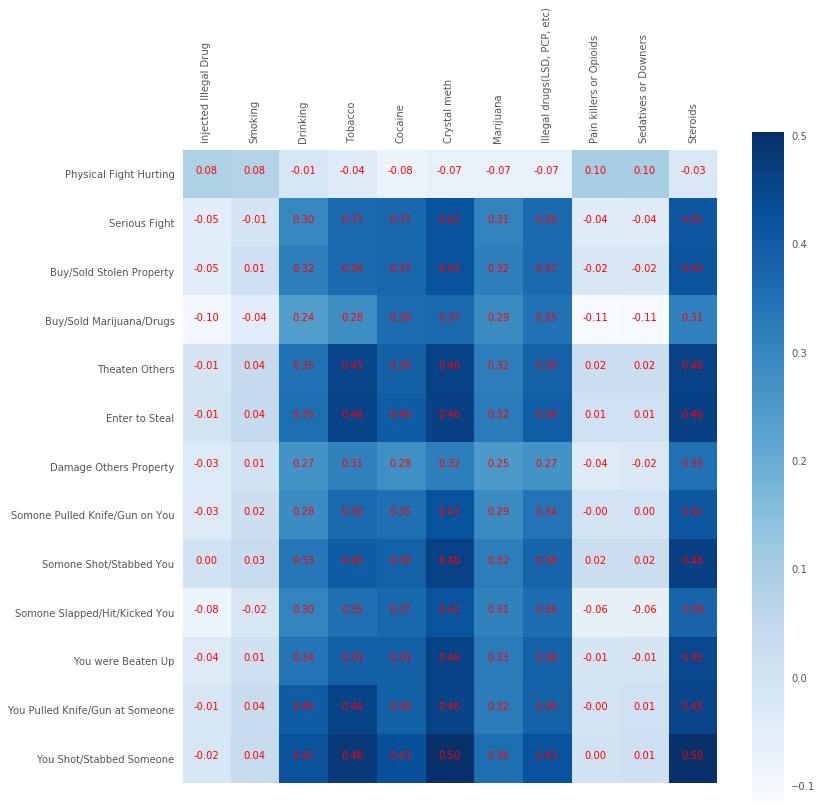

In [94]:
with plt.style.context(("seaborn","ggplot")):
    plt.figure(figsize=(12,12))
    plt.matshow(crime_to_source_corr_df.values, cmap=plt.cm.Blues, fignum=1)
    plt.xticks(range(crime_to_source_corr_df.shape[1]), crime_to_source_corr_df.columns, rotation=90);
    plt.yticks(range(crime_to_source_corr_df.shape[0]), crime_to_source_corr_df.index)
    plt.colorbar()
    plt.grid(None)
    for i in range(crime_to_source_corr_df.shape[0]):
        for j in range(crime_to_source_corr_df.shape[1]):
            plt.text(j,i, "%.2f"%crime_to_source_corr_df.values[i,j], horizontalalignment="center",color="red")
            

In [35]:
short_names = ["Physical Fight Hurting", "Serious Fight", "Buy/Sold Stolen Property",
                            "Buy/Sold Marijuana/Drugs", "Theaten Others", "Enter to Steal",
                            "Damage Others Property", "Somone Pulled Knife/Gun on You", "Somone Shot/Stabbed You",
                                "Somone Slapped/Hit/Kicked You", "You were Beaten Up",
                                "You Pulled Knife/Gun at Someone", "You Shot/Stabbed Someone"]

short_mapping = dict(zip(y_cols, short_names))
crime_type = []
for i in range(final_df.shape[0]):
    intermediate_ser = final_df[y_cols].loc[i]
    crimes = [] 
    for col in y_cols:
        if intermediate_ser[col] in [1,2,3,1.0,2.0,3.0]:
            crimes.append(short_mapping[col])
    if crimes and len(crimes) > 1:
        crime_type.append("Multiple Crime")
    elif len(crimes) ==1:
        crime_type.append(crimes[0])
    else:
        crime_type.append("No Crime")

In [36]:
ml_df = final_df[x_cols]
ml_df.columns = [
                "Smoking", "Drinking", "Sedatives or Downers", "Pain killers or Opioids", 
                 "Steroids", "Marijuana", "Cocaine","Crystal meth", "Illegal drugs(LSD, PCP, etc)",
                 "injected Illegal Drug","Tobacco",
                ]
ml_df["Crime_Type"] = crime_type
print(Counter(ml_df["Crime_Type"]))
ml_df = ml_df[~ml_df["Crime_Type"].isin(["Theaten Others", "Somone Shot/Stabbed You","No Crime"])]
print(Counter(ml_df["Crime_Type"]))
ml_df.head()

Counter({'No Crime': 4131, 'Multiple Crime': 523, 'Somone Slapped/Hit/Kicked You': 130, 'Buy/Sold Marijuana/Drugs': 93, 'Damage Others Property': 74, 'Somone Pulled Knife/Gun on You': 54, 'Buy/Sold Stolen Property': 42, 'Serious Fight': 35, 'You Pulled Knife/Gun at Someone': 13, 'Enter to Steal': 8, 'You were Beaten Up': 7, 'You Shot/Stabbed Someone': 2, 'Theaten Others': 1, 'Somone Shot/Stabbed You': 1})
Counter({'Multiple Crime': 523, 'Somone Slapped/Hit/Kicked You': 130, 'Buy/Sold Marijuana/Drugs': 93, 'Damage Others Property': 74, 'Somone Pulled Knife/Gun on You': 54, 'Buy/Sold Stolen Property': 42, 'Serious Fight': 35, 'You Pulled Knife/Gun at Someone': 13, 'Enter to Steal': 8, 'You were Beaten Up': 7, 'You Shot/Stabbed Someone': 2})


,Smoking,Drinking,Sedatives or Downers,Pain killers or Opioids,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco,Crime_Type
1,0,0,7,7,0,1,0,0,0,7,0,Multiple Crime
2,0,1,1,1,0,1,1,0,1,7,0,Somone Slapped/Hit/Kicked You
13,7,1,7,7,0,0,0,0,0,7,0,Somone Slapped/Hit/Kicked You
14,7,1,7,7,0,1,1,1,1,7,0,Multiple Crime
19,1,0,7,7,0,1,0,0,0,7,0,Multiple Crime


In [37]:
crime_type_mapping_ml = dict(zip(ml_df.Crime_Type.unique(), range(ml_df.Crime_Type.unique().shape[0])))

print(crime_type_mapping_ml)

ml_df["Crime_Type"] =  [crime_type_mapping_ml[c] for c in ml_df["Crime_Type"]]
ml_df.head()

{'Multiple Crime': 0, 'Somone Slapped/Hit/Kicked You': 1, 'Buy/Sold Marijuana/Drugs': 2, 'Buy/Sold Stolen Property': 3, 'Damage Others Property': 4, 'Serious Fight': 5, 'Somone Pulled Knife/Gun on You': 6, 'Enter to Steal': 7, 'You were Beaten Up': 8, 'You Pulled Knife/Gun at Someone': 9, 'You Shot/Stabbed Someone': 10}


,Smoking,Drinking,Sedatives or Downers,Pain killers or Opioids,Steroids,Marijuana,Cocaine,Crystal meth,"Illegal drugs(LSD, PCP, etc)",injected Illegal Drug,Tobacco,Crime_Type
1,0,0,7,7,0,1,0,0,0,7,0,0
2,0,1,1,1,0,1,1,0,1,7,0,1
13,7,1,7,7,0,0,0,0,0,7,0,1
14,7,1,7,7,0,1,1,1,1,7,0,0
19,1,0,7,7,0,1,0,0,0,7,0,0


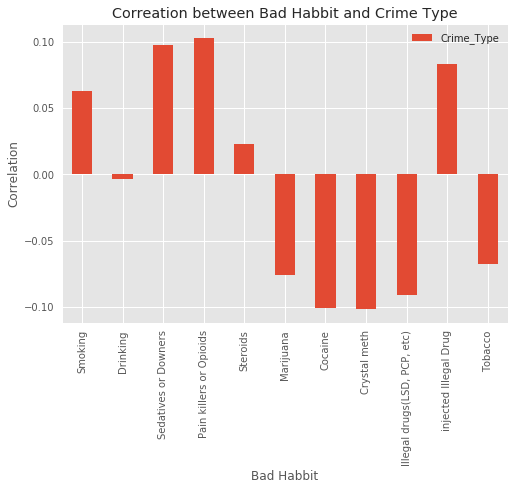

In [38]:
bad_habbit_to_crime_corr = ml_df.corr()[["Crime_Type"]]
bad_habbit_to_crime_corr = bad_habbit_to_crime_corr[bad_habbit_to_crime_corr.index != "Crime_Type"]
with plt.style.context(("seaborn", "ggplot")):
    bad_habbit_to_crime_corr.plot(kind="bar")
    plt.title("Correation between Bad Habbit and Crime Type")
    plt.xlabel("Bad Habbit")
    plt.ylabel("Correlation")

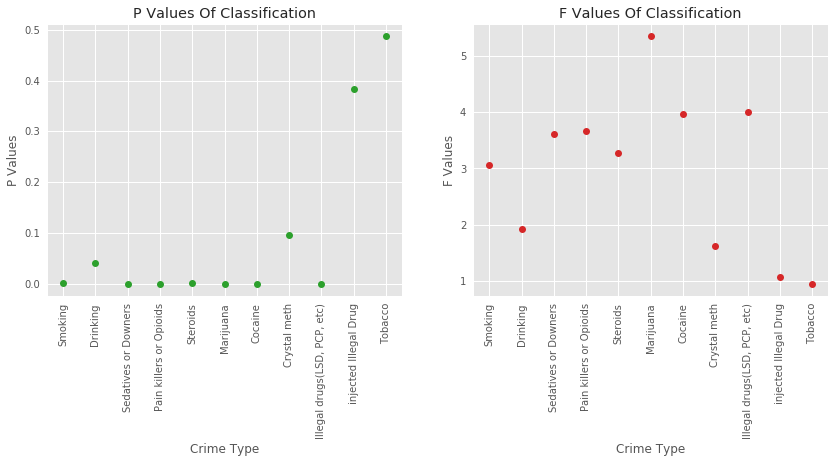

In [39]:
F_classif, p_value_classif = f_classif(ml_df.drop(columns=["Crime_Type"]).values, ml_df["Crime_Type"].values)

cols = list(ml_df.columns)
cols.remove("Crime_Type")

with plt.style.context(('seaborn', 'ggplot')):
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.plot(p_value_classif, 'o', c = 'tab:green')
    plt.xticks(range(len(cols)), cols, rotation=90)
    plt.xlabel("Crime Type")
    plt.ylabel("P Values")
    plt.title('P Values Of Classification');

    plt.subplot(122)
    plt.plot(F_classif, 'o', c = 'tab:red')
    plt.xticks(range(len(cols)), cols, rotation=90)
    plt.xlabel("Crime Type")
    plt.ylabel("F Values")
    plt.title('F Values Of Classification');

In [40]:
X = ml_df.drop(columns=["Crime_Type"]).values
Y = ml_df["Crime_Type"].values
print("Dataset Size : ", X.shape, Y.shape)

Dataset Size :  (981, 11) (981,)


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, stratify=Y, random_state=123)
print("Train/Test Sizes : ",X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (784, 11) (197, 11) (784,) (197,)


In [42]:
lr = LogisticRegression(random_state=123)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
print("Test Accuracy : %.2f"%lr.score(X_test, Y_test))
print("Train Accuracy : %.2f"%lr.score(X_train, Y_train))
print("Classification Report : ")
print(classification_report(Y_test, lr.predict(X_test)))

Test Accuracy : 0.53
Train Accuracy : 0.53
Classification Report : 
              precision    recall  f1-score   support

           0       0.53      0.99      0.69       105
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3

    accuracy                           0.53       197
   macro avg       0.05      0.10      0.07       197
weighted avg       0.28      0.53      0.37       197



In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
print("Test Accuracy : %.2f"%rf.score(X_test, Y_test))
print("Train Accuracy : %.2f"%rf.score(X_train, Y_train))
print("Classification Report : ")
print(classification_report(Y_test, rf.predict(X_test)))

Test Accuracy : 0.49
Train Accuracy : 0.60
Classification Report : 
              precision    recall  f1-score   support

           0       0.54      0.90      0.67       105
           1       0.12      0.04      0.06        26
           2       0.10      0.05      0.07        19
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3

    accuracy                           0.49       197
   macro avg       0.08      0.10      0.08       197
weighted avg       0.31      0.49      0.37       197



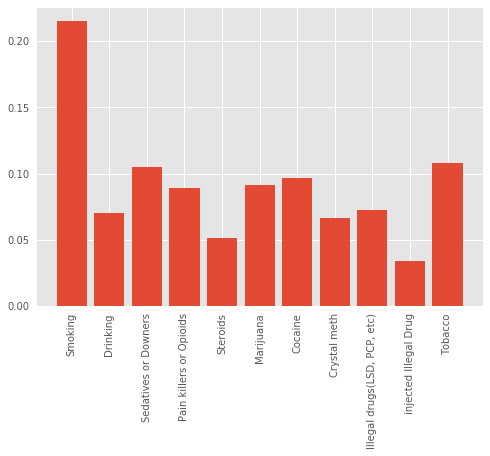

In [46]:
with plt.style.context(("seaborn", "ggplot")):
    plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
    plt.xticks(range(len(rf.feature_importances_)), ml_df.drop(columns=["Crime_Type"]).columns,rotation=90)

In [47]:
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [48]:
print("Test Accuracy : %.2f"%gb.score(X_test, Y_test))
print("Train Accuracy : %.2f"%gb.score(X_train, Y_train))
print("Classification Report : ")
print(classification_report(Y_test, gb.predict(X_test)))

Test Accuracy : 0.51
Train Accuracy : 0.57
Classification Report : 
              precision    recall  f1-score   support

           0       0.53      0.92      0.67       105
           1       0.00      0.00      0.00        26
           2       0.33      0.11      0.16        19
           3       0.00      0.00      0.00         8
           4       0.33      0.07      0.11        15
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3

    accuracy                           0.51       197
   macro avg       0.12      0.11      0.09       197
weighted avg       0.34      0.51      0.38       197



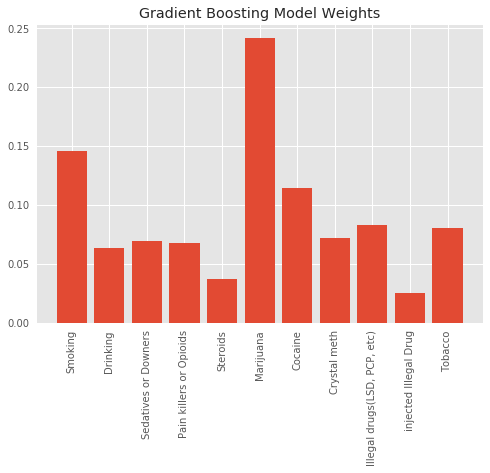

In [91]:
with plt.style.context(("seaborn", "ggplot")):
    plt.bar(range(len(gb.feature_importances_)), gb.feature_importances_)
    plt.xticks(range(len(gb.feature_importances_)), ml_df.drop(columns=["Crime_Type"]).columns,rotation=90)
    plt.title("Gradient Boosting Model Weights")